In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [2]:
job_df = pd.read_csv('/content/job_descriptions.csv', on_bad_lines='skip', engine='python')
df = job_df.copy()
df

Job Id     Experience Qualifications Salary Range  \
0      1089843540111562  5 to 15 Years         M.Tech    $59K-$99K   
1       398454096642776  2 to 12 Years            BCA   $56K-$116K   
2       481640072963533  0 to 12 Years            PhD   $61K-$104K   
3       688192671473044  4 to 11 Years            PhD    $65K-$91K   
4       117057806156508  1 to 12 Years            MBA    $64K-$87K   
...                 ...            ...            ...          ...   
33992   403408431524081  1 to 12 Years            MCA   $62K-$128K   
33993  2151401859046226  1 to 12 Years            BBA   $58K-$102K   
33994  2057879090379238  0 to 15 Years            MBA   $56K-$108K   
33995  1624046847073866   3 to 8 Years         B.Tech   $64K-$126K   
33996   446731023329341  2 to 14 Years          M.Com   $60K-$116K   

               location           Country  latitude  longitude  Work Type  \
0               Douglas       Isle of Man   54.2361    -4.5481     Intern   
1              Ashgabat      Turkmenistan   38.9697    59.5563     Intern   
2                 Macao  Macao SAR, China   22.1987   113.5439  Temporary   
3            Porto-Novo             Benin    9.3077     2.3158  Full-Time   
4              Santiago             Chile  -35.6751   -71.5429     Intern   
...                 ...               ...       ...        ...        ...   
33992        Georgetown            Guyana    4.8604   -58.9302  Full-Time   
33993  Andorra la Vella           Andorra   42.5063     1.5218   Contract   
33994          San Juan       Puerto Rico   18.2208   -66.5901     Intern   
33995  Washington, D.C.               USA   37.0902   -95.7129     Intern   
33996             Sofia          Bulgaria   42.7339    25.4858     Intern   

       Company Size  ...                Contact                     Job Title  \
0             26801  ...   001-381-930-7517x737  Digital Marketing Specialist   
1            100340  ...           461-509-4216                 Web Developer   
2             84525  ...             9687619505            Operations Manager   
3            129896  ...  +1-820-643-5431x47576              Network Engineer   
4             53944  ...      343.975.4702x9340                 Event Manager   
...             ...  ...                    ...                           ...   
33992         17048  ...  001-803-593-6421x4210           Electrical Engineer   
33993         95472  ...          (934)480-1506             Software Engineer   
33994         42127  ...      347-946-6477x7876              Speech Therapist   
33995        116659  ...     (868)572-6921x2225         Marketing Coordinator   
33996         66233  ...      625-567-6568x7523                    Accountant   

                                Role           Job Portal  \
0               Social Media Manager             Snagajob   
1             Frontend Web Developer             Idealist   
2            Quality Control Manager         Jobs2Careers   
3          Wireless Network Engineer             FlexJobs   
4                 Conference Manager         Jobs2Careers   
...                              ...                  ...   
33992              Controls Engineer                 Dice   
33993             Frontend Developer  Stack Overflow Jobs   
33994     Pediatric Speech Therapist  Stack Overflow Jobs   
33995  Digital Marketing Coordinator  Stack Overflow Jobs   
33996           Financial Accountant              USAJOBS   

                                         Job Description  \
0      Social Media Managers oversee an organizations...   
1      Frontend Web Developers design and implement u...   
2      Quality Control Managers establish and enforce...   
3      Wireless Network Engineers design, implement, ...   
4      A Conference Manager coordinates and manages c...   
...                                                  ...   
33992  Controls Engineers specialize in industrial au...   
33993  A Frontend Developer is responsible for design...   
33994

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33997 entries, 0 to 33996
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Id            33997 non-null  int64  
 1   Experience        33997 non-null  object 
 2   Qualifications    33997 non-null  object 
 3   Salary Range      33997 non-null  object 
 4   location          33997 non-null  object 
 5   Country           33997 non-null  object 
 6   latitude          33997 non-null  float64
 7   longitude         33997 non-null  float64
 8   Work Type         33997 non-null  object 
 9   Company Size      33997 non-null  int64  
 10  Job Posting Date  33997 non-null  object 
 11  Preference        33997 non-null  object 
 12  Contact Person    33997 non-null  object 
 13  Contact           33997 non-null  object 
 14  Job Title         33997 non-null  object 
 15  Role              33997 non-null  object 
 16  Job Portal        33997 non-null  object

In [4]:
df.columns = df.columns.str.strip()
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

In [5]:
df.drop(columns=['latitude', 'longitude','Job Id', 'Country', 'location','Contact Person','Contact','Job Portal','Benefits'], inplace= True)
df

Experience Qualifications Salary Range  Work Type  Company Size  \
0      5 to 15 Years         M.Tech    $59K-$99K     Intern         26801   
1      2 to 12 Years            BCA   $56K-$116K     Intern        100340   
2      0 to 12 Years            PhD   $61K-$104K  Temporary         84525   
3      4 to 11 Years            PhD    $65K-$91K  Full-Time        129896   
4      1 to 12 Years            MBA    $64K-$87K     Intern         53944   
...              ...            ...          ...        ...           ...   
33992  1 to 12 Years            MCA   $62K-$128K  Full-Time         17048   
33993  1 to 12 Years            BBA   $58K-$102K   Contract         95472   
33994  0 to 15 Years            MBA   $56K-$108K     Intern         42127   
33995   3 to 8 Years         B.Tech   $64K-$126K     Intern        116659   
33996  2 to 14 Years          M.Com   $60K-$116K     Intern         66233   

      Job Posting Date Preference                     Job Title  \
0           2022-04-24     Female  Digital Marketing Specialist   
1           2022-12-19     Female                 Web Developer   
2           2022-09-14       Male            Operations Manager   
3           2023-02-25     Female              Network Engineer   
4           2022-10-11     Female                 Event Manager   
...                ...        ...                           ...   
33992       2022-04-24     Female           Electrical Engineer   
33993       2022-04-02       Male             Software Engineer   
33994       2021-11-12     Female              Speech Therapist   
33995       2023-04-29     Female         Marketing Coordinator   
33996       2022-05-23     Female                    Accountant   

                                Role  \
0               Social Media Manager   
1             Frontend Web Developer   
2            Quality Control Manager   
3          Wireless Network Engineer   
4                 Conference Manager   
...                              ...   
33992              Controls Engineer   
33993             Frontend Developer   
33994     Pediatric Speech Therapist   
33995  Digital Marketing Coordinator   
33996           Financial Accountant   

                                         Job Description  \
0      Social Media Managers oversee an organizations...   
1      Frontend Web Developers design and implement u...   
2      Quality Control Managers establish and enforce...   
3      Wireless Network Engineers design, implement, ...   
4      A Conference Manager coordinates and manages c...   
...                                                  ...   
33992  Controls Engineers specialize in industrial au...   
33993  A Frontend Developer is responsible for design...   
33994  Pediatric Speech Therapists provide speech the...   
33995  Digital Marketing Coordinators manage online m...   
33996  Financial Accountants handle financial records...   

                                                  skills  \
0      Social media platforms (e.g., Facebook, Twitte...   
1      HTML, CSS, JavaScript Frontend frameworks (e.g...   
2      Quality control processes and methodologies St...   
3      Wireless network design and architecture Wi-Fi...   
4      Event planning Conference logistics Budget man...   
...                                                  ...   
33992  Control system design PLC programming Automati...   
33993  Proficiency in HTML, CSS, and JavaScript Exper...   
33994  Pediatric speech therapy Speech-language asses...   
33995  Digital marketing strategy development Social ...   
33996  Financial reporting Accounting software (e.g.,...   

                                        Responsibilities  \
0      Manage and grow social media accounts, create ...   
1      Design and code user interfaces for websites, ...   
2      Establish and enforce quality control standard...   
3      Design, configure, and optimize wireless netwo...   
4      Specialize in conference and convention planni... 

In [6]:
current_columns = df.columns.tolist()

# Create new column names by replacing spaces with underscores
new_columns = [col.replace(' ', '_') for col in current_columns]
df.rename(columns={'skills': 'Skills'}, inplace= True)
# Assign the new column names to the DataFrame
df.columns = new_columns

In [7]:
df.isnull().sum()

Experience            0
Qualifications        0
Salary_Range          0
Work_Type             0
Company_Size          0
Job_Posting_Date      0
Preference            0
Job_Title             0
Role                  0
Job_Description       0
skills                0
Responsibilities      0
Company               0
Company_Profile     101
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

Experience          0
Qualifications      0
Salary_Range        0
Work_Type           0
Company_Size        0
Job_Posting_Date    0
Preference          0
Job_Title           0
Role                0
Job_Description     0
skills              0
Responsibilities    0
Company             0
Company_Profile     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df

Experience Qualifications Salary_Range  Work_Type  Company_Size  \
0      5 to 15 Years         M.Tech    $59K-$99K     Intern         26801   
1      2 to 12 Years            BCA   $56K-$116K     Intern        100340   
2      0 to 12 Years            PhD   $61K-$104K  Temporary         84525   
3      4 to 11 Years            PhD    $65K-$91K  Full-Time        129896   
4      1 to 12 Years            MBA    $64K-$87K     Intern         53944   
...              ...            ...          ...        ...           ...   
33992  1 to 12 Years            MCA   $62K-$128K  Full-Time         17048   
33993  1 to 12 Years            BBA   $58K-$102K   Contract         95472   
33994  0 to 15 Years            MBA   $56K-$108K     Intern         42127   
33995   3 to 8 Years         B.Tech   $64K-$126K     Intern        116659   
33996  2 to 14 Years          M.Com   $60K-$116K     Intern         66233   

      Job_Posting_Date Preference                     Job_Title  \
0           2022-04-24     Female  Digital Marketing Specialist   
1           2022-12-19     Female                 Web Developer   
2           2022-09-14       Male            Operations Manager   
3           2023-02-25     Female              Network Engineer   
4           2022-10-11     Female                 Event Manager   
...                ...        ...                           ...   
33992       2022-04-24     Female           Electrical Engineer   
33993       2022-04-02       Male             Software Engineer   
33994       2021-11-12     Female              Speech Therapist   
33995       2023-04-29     Female         Marketing Coordinator   
33996       2022-05-23     Female                    Accountant   

                                Role  \
0               Social Media Manager   
1             Frontend Web Developer   
2            Quality Control Manager   
3          Wireless Network Engineer   
4                 Conference Manager   
...                              ...   
33992              Controls Engineer   
33993             Frontend Developer   
33994     Pediatric Speech Therapist   
33995  Digital Marketing Coordinator   
33996           Financial Accountant   

                                         Job_Description  \
0      Social Media Managers oversee an organizations...   
1      Frontend Web Developers design and implement u...   
2      Quality Control Managers establish and enforce...   
3      Wireless Network Engineers design, implement, ...   
4      A Conference Manager coordinates and manages c...   
...                                                  ...   
33992  Controls Engineers specialize in industrial au...   
33993  A Frontend Developer is responsible for design...   
33994  Pediatric Speech Therapists provide speech the...   
33995  Digital Marketing Coordinators manage online m...   
33996  Financial Accountants handle financial records...   

                                                  skills  \
0      Social media platforms (e.g., Facebook, Twitte...   
1      HTML, CSS, JavaScript Frontend frameworks (e.g...   
2      Quality control processes and methodologies St...   
3      Wireless network design and architecture Wi-Fi...   
4      Event planning Conference logistics Budget man...   
...                                                  ...   
33992  Control system design PLC programming Automati...   
33993  Proficiency in HTML, CSS, and JavaScript Exper...   
33994  Pediatric speech therapy Speech-language asses...   
33995  Digital marketing strategy development Social ...   
33996  Financial reporting Accounting software (e.g.,...   

                                        Responsibilities  \
0      Manage and grow social media accounts, create ...   
1      Design and code user interfaces for websites, ...   
2      Establish and enforce quality control standard...   
3      Design, configure, and optimize wireless netwo...   
4      Specialize in conference and convention planni... 

In [11]:
import re
def parse_experience(exp_str):
    if pd.isna(exp_str) or not isinstance(exp_str, str):
        return np.nan, np.nan # Return NaN for missing or non-string values

    # Convert to lowercase for consistent parsing
    exp_str_lower = exp_str.lower()

    # Regex to find numbers that could represent years of experience
    matches = re.findall(r'(\d+)\s*(?:to|-)?\s*(\d+)?\s*(?:year)?', exp_str_lower)

    if matches:
        # If a range like 'X to Y' or 'X-Y' is found
        if matches[0][1]:
            min_exp = int(matches[0][0])
            max_exp = int(matches[0][1])
            return min_exp, max_exp
        # If only a single number is found (e.g., '5 years')
        else:
            single_exp = int(matches[0][0])
    return np.nan, np.nan # Default to NaN if no recognizable pattern is found


df[['Min_Experience', 'Max_Experience']] = df['Experience'].apply(lambda x: pd.Series(parse_experience(x)))

# Calculate Average_Experience
# Handle cases where Min_Experience or Max_Experience might be NaN
df['Average_Experience'] = df.apply(lambda row: (row['Min_Experience'] + row['Max_Experience']) / 2
                                    if pd.notna(row['Min_Experience']) and pd.notna(row['Max_Experience'])
                                    else np.nan, axis=1)


In [12]:
def parse_salary_range(salary_str):
    if pd.isna(salary_str) or not isinstance(salary_str, str):
        return np.nan, np.nan

    # Convert to lowercase and remove common currency symbols and commas
    salary_str_cleaned = salary_str.lower().replace('$', '').replace('£', '').replace(',', '')

    # Regex to find numbers and optionally 'k'
    # It captures the number (group 1) and then optionally 'k' (group 2)
    matches = re.findall(r'(\d+\.?\d*)\s*(k)?', salary_str_cleaned)

    if not matches:
        return np.nan, np.nan # No recognizable numbers found

    numerical_values = []
    for num_str, k_suffix in matches:
        value = float(num_str)
        if k_suffix == 'k': # If 'k' suffix is present, multiply by 1000
            value *= 1000
        numerical_values.append(value)

    if not numerical_values:
        return np.nan, np.nan

    min_salary = min(numerical_values)
    max_salary = max(numerical_values)

    return min_salary, max_salary


# Apply the function to the 'Salary_Range' column
df[['Min_Salary', 'Max_Salary']] = df['Salary_Range'].apply(lambda x: pd.Series(parse_salary_range(x)))

# Calculate Average_Salary
df['Average_Salary'] = df.apply(lambda row: (row['Min_Salary'] + row['Max_Salary']) / 2
                                 if pd.notna(row['Min_Salary']) and pd.notna(row['Max_Salary'])
                                 else np.nan, axis=1)

In [13]:
df['Qualifications'].unique()

array(['M.Tech', 'BCA', 'PhD', 'MBA', 'MCA', 'M.Com', 'BBA', 'B.Tech',
       'B.Com', 'BA'], dtype=object)

In [14]:
qualification_mapping = {
    'High School': 1,
    'Diploma': 1,
    'BCA': 2,
    'B.Com': 2,
    'BBA': 2,
    'BA': 2,
    'B.Tech': 3,
    'BE': 3, # Assuming BE is equivalent to B.Tech
    'MCA': 4,
    'M.Com': 4,
    'MBA': 5,
    'M.Tech': 5,
    'M.Sc': 5, # Assuming M.Sc is similar level
    'PhD': 6,
    'MD': 6 # Assuming MD is similar level to PhD in terms of advanced study
}

df['Qualifications'] = df['Qualifications'].apply(
    lambda x: qualification_mapping.get(x, np.nan)
)

In [15]:
df.drop(columns=['Experience', 'Salary_Range'], inplace= True)
df

Qualifications  Work_Type  Company_Size Job_Posting_Date Preference  \
0                   5     Intern         26801       2022-04-24     Female   
1                   2     Intern        100340       2022-12-19     Female   
2                   6  Temporary         84525       2022-09-14       Male   
3                   6  Full-Time        129896       2023-02-25     Female   
4                   5     Intern         53944       2022-10-11     Female   
...               ...        ...           ...              ...        ...   
33992               4  Full-Time         17048       2022-04-24     Female   
33993               2   Contract         95472       2022-04-02       Male   
33994               5     Intern         42127       2021-11-12     Female   
33995               3     Intern        116659       2023-04-29     Female   
33996               4     Intern         66233       2022-05-23     Female   

                          Job_Title                           Role  \
0      Digital Marketing Specialist           Social Media Manager   
1                     Web Developer         Frontend Web Developer   
2                Operations Manager        Quality Control Manager   
3                  Network Engineer      Wireless Network Engineer   
4                     Event Manager             Conference Manager   
...                             ...                            ...   
33992           Electrical Engineer              Controls Engineer   
33993             Software Engineer             Frontend Developer   
33994              Speech Therapist     Pediatric Speech Therapist   
33995         Marketing Coordinator  Digital Marketing Coordinator   
33996                    Accountant           Financial Accountant   

                                         Job_Description  \
0      Social Media Managers oversee an organizations...   
1      Frontend Web Developers design and implement u...   
2      Quality Control Managers establish and enforce...   
3      Wireless Network Engineers design, implement, ...   
4      A Conference Manager coordinates and manages c...   
...                                                  ...   
33992  Controls Engineers specialize in industrial au...   
33993  A Frontend Developer is responsible for design...   
33994  Pediatric Speech Therapists provide speech the...   
33995  Digital Marketing Coordinators manage online m...   
33996  Financial Accountants handle financial records...   

                                                  skills  \
0      Social media platforms (e.g., Facebook, Twitte...   
1      HTML, CSS, JavaScript Frontend frameworks (e.g...   
2      Quality control processes and methodologies St...   
3      Wireless network design and architecture Wi-Fi...   
4      Event planning Conference logistics Budget man...   
...                                                  ...   
33992  Control system design PLC programming Automati...   
33993  Proficiency in HTML, CSS, and JavaScript Exper...   
33994  Pediatric speech therapy Speech-language asses...   
33995  Digital marketing strategy development Social ...   
33996  Financial reporting Accounting software (e.g.,...   

                                        Responsibilities  \
0      Manage and grow social media accounts, create ...   
1      Design and code user interfaces for websites, ...   
2      Establish and enforce quality control standard...   
3      Design, configure, and optimize wireless netwo...   
4      Specialize in conference and convention planni...   
...                                                  ...   
33992  Design and implement control systems for indus...   
33993  Design and implement user interfaces for web a...   
33994  Assess and treat speech and language disorders...   
33995  Support digital marketing efforts, including s...   
33996  Maintain financial records, prepare financial ...   

                                    Company  \
0                  

In [36]:
df.sample(20)

Qualifications  Work_Type  Company_Size Job_Posting_Date Preference  \
31591               2     Intern        100948       2022-04-17       Male   
23763               3   Contract         61065       2021-10-31       Male   
18968               3   Contract         70637       2022-02-03       Male   
10582               5   Contract        126639       2022-08-20       Both   
4855                2  Temporary         63044       2021-09-21     Female   
15022               3  Temporary        121034       2022-09-03       Both   
7969                2     Intern         53134       2022-04-24       Both   
6861                4  Full-Time         84623       2023-03-16       Both   
27029               4  Full-Time         56882       2023-04-13       Both   
9401                5  Temporary         45637       2023-04-12       Both   
12876               2     Intern         25959       2022-11-18       Both   
1906                2   Contract         54481       2021-11-25       Both   
29035               2  Full-Time        114462       2021-09-16     Female   
21762               2  Part-Time         96038       2022-02-02       Male   
18569               5     Intern         43244       2022-06-25     Female   
21594               5  Temporary         89843       2022-11-09     Female   
33325               5     Intern         89477       2023-07-12       Male   
2744                4  Full-Time         97540       2022-06-22       Male   
19836               3   Contract         36809       2022-04-09       Male   
21399               5   Contract        126441       2021-11-15     Female   

                      Job_Title                            Role  \
31591     IT Support Specialist        IT Systems Administrator   
23763          Speech Therapist              Speech Pathologist   
18968              Web Designer         E-commerce Web Designer   
10582                 Paralegal            Litigation Paralegal   
4855            Software Tester       Quality Assurance Analyst   
15022    Procurement Specialist             Procurement Manager   
7969               Data Analyst   Business Intelligence Analyst   
6861        Procurement Manager      Strategic Sourcing Manager   
27029          Dental Hygienist  Dental Public Health Hygienist   
9401          Software Engineer              Frontend Developer   
12876      Supply Chain Manager               Logistics Manager   
1906                Art Teacher            Fine Arts Instructor   
29035             Nurse Manager          Clinical Nurse Manager   
21762          Technical Writer          Instructional Designer   
18569           Product Manager       Technical Product Manager   
21594  Customer Success Manager     Customer Support Specialist   
33325            HR Coordinator         Recruitment Coordinator   
2744   Customer Service Manager        Customer Support Manager   
19836      Marketing Specialist  Marketing Analytics Specialist   
21399       Litigation Attorney                  Trial Attorney   

                                         Job_Description  \
31591  IT Systems Administrators manage and maintain ...   
23763  Speech Pathologists diagnose and treat speech,...   
18968  E-commerce Web Designers specialize in designi...   
10582  Assist in litigation cases, including document...   
4855   A Quality Assurance Analyst tests software and...   
15022  Procurement Managers oversee procurement proce...   
7969   Business Intelligence Analysts gather and anal...   
6861   Develop and execute sourcing strategies to pro...   
27029  A Dental Public Health Hygienist works to impr...   
9401   A Frontend Developer is responsible for design...   
12876  A Logistics Manager oversees the movement and ...   
1906   A Fine Arts Instructor teaches various forms o...   
29035  Clinical Nurse Managers lead and supervise nur...   
21762  Instructional Designers develop educational ma...   
18569  Technical Product Managers oversee the develop...   


In [16]:
df['Job_Posting_Date'] = pd.to_datetime(df['Job_Posting_Date'], errors='coerce')
df['Job_Posting_YearMonth'] = df['Job_Posting_Date'].dt.to_period('M').astype(str)

In [18]:
# from sklearn.cluster import KMeans # Will be used in the next step
# from sentence_transformers import SentenceTransformer # Will be used in the next step
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# --- Step 1: Handle Missing Values in Key Text Columns (Re-emphasizing for clarity) ---
# Fill NaN values in relevant text columns with empty strings before concatenation.

text_cols_for_processing = ['Job_Title', 'Role', 'Job_Description', 'skills', 'Responsibilities']

for col in text_cols_for_processing:
    if col in df.columns:
        df[col] = df[col].fillna('')
    else:
        print(f"Warning: Text column '{col}' not found in DataFrame. Skipping.")

print("\nMissing values filled with empty strings for core text columns.")


# --- Step 2: Combine Text Columns into a Single Feature ---
# Concatenate relevant text columns into a new 'full_text' column.

combined_text_parts = []
for col in text_cols_for_processing:
    if col in df.columns:
        combined_text_parts.append(df[col])
    else:
        print(f"Warning: Column '{col}' not available for text combination.")

if combined_text_parts:
    df['full_text'] = combined_text_parts[0]
    for i in range(1, len(combined_text_parts)):
        df['full_text'] += " " + combined_text_parts[i]
else:
    df['full_text'] = ""  # Create an empty 'full_text' column if no text columns are available.
    print("Error: No text columns found to create 'full_text'.")


print("\nCombined text into 'full_text' column.")
print("Sample of 'full_text':")
print(df['full_text'].head(1).iloc[0][:500], "...") # Print first 500 characters of the first entry


# --- Step 3: Text Cleaning and Normalization ---
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower() # Convert to string and lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and special characters
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace

    # Remove stop words
    text = " ".join([word for word in text.split() if word not in stop_words])

    # Lemmatize
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

print("\nApplying text cleaning and normalization to 'full_text'...")
df['cleaned_full_text'] = df['full_text'].apply(clean_text)

print("Sample of 'cleaned_full_text':")
print(df['cleaned_full_text'].head(1).iloc[0][:500], "...") # Print first 500 characters of the first cleaned entry

print("\nText columns are now cleaned and ready for embedding generation.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Missing values filled with empty strings for core text columns.

Combined text into 'full_text' column.
Sample of 'full_text':
Digital Marketing Specialist Social Media Manager Social Media Managers oversee an organizations social media presence. They create and schedule content, engage with followers, and analyze social media metrics to drive brand awareness and engagement. Social media platforms (e.g., Facebook, Twitter, Instagram) Content creation and scheduling Social media analytics and insights Community engagement Paid social advertising Manage and grow social media accounts, create engaging content, and interact ...

Applying text cleaning and normalization to 'full_text'...
Sample of 'cleaned_full_text':
digital marketing specialist social medium manager social medium manager oversee organization social medium presence create schedule content engage follower analyze social medium metric drive brand awareness engagement social medium platform eg facebook twitter instagram cont

In [28]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# 'all-MiniLM-L6-v2' is a good general-purpose model.
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

job_description_embeddings = sbert_model.encode(df['cleaned_full_text'].tolist(), show_progress_bar=True)

print(f"\nEmbeddings generated. Shape: {job_description_embeddings.shape}")
print(f"Example embedding for the first job (first 10 values): {job_description_embeddings[0][:10]}")

Batches:   0%|          | 0/1060 [00:00<?, ?it/s]


Embeddings generated. Shape: (33896, 384)
Example embedding for the first job (first 10 values): [ 0.07789155 -0.07675608 -0.02267269  0.0767662   0.04132774 -0.04476567
  0.0041065   0.02810099 -0.05753263  0.01327419]


In [33]:
# Set the number of clusters (K) to 8, matching your predefined categories.
num_categories = 9

print(f"\nApplying K-Means clustering with {num_categories} clusters...")
# n_init='auto' or 10 is recommended for K-Means robustness
kmeans_model = KMeans(n_clusters=num_categories, random_state=42, n_init='auto')
df['cluster_id'] = kmeans_model.fit_predict(job_description_embeddings)

print("Clustering complete. Distribution of cluster IDs:")
print(df['cluster_id'].value_counts().sort_index())


Applying K-Means clustering with 9 clusters...
Clustering complete. Distribution of cluster IDs:
cluster_id
0    1299
1    3680
2    4360
3    3904
4    2790
5    2527
6    3770
7    6467
8    5099
Name: count, dtype: int64


In [34]:
print("\n--- Manual Review Step: Examine Clusters to Assign Meaningful Categories ---")
print("For each cluster ID, review a sample of 'Job_Title' (original) and 'cleaned_full_text' to understand its theme.")
print("Then, create a mapping from 'cluster_id' to our desired 'Category' name.")

# Ensure 'Job_Title' column exists and is correctly named (e.g., 'Job_Title' vs 'Job Title')
# Use the *original* column names here for better human readability during review
original_title_col = 'Job_Title' if 'Job_Title' in df.columns else 'Job Title'
original_description_col = 'Job_Description' if 'Job_Description' in df.columns else 'Job Description'
original_responsibility_col = 'Responsibilities' if 'Responsibilities' in df.columns else 'Responsibilities'


for cluster_id in sorted(df['cluster_id'].unique()):
    print(f"\n--- Cluster ID: {cluster_id} --- (Sample size: 10)")
    # Ensure there are enough samples to pick from
    num_samples = min(10, len(df[df['cluster_id'] == cluster_id]))

    if num_samples > 0:
        sample_jobs = df[df['cluster_id'] == cluster_id].sample(num_samples, random_state=42)
        for idx, row in sample_jobs.iterrows():
            # Display the ORIGINAL Job Title and a snippet of the ORIGINAL Job Description/Company Profile
            print(f"  Original Job Title: {row[original_title_col]}")
            print(f"  Original Job Desc Snippet: {str(row[original_description_col])[:100]}...") # First 100 chars
            print(f"  Original Responsibility Snippet: {str(row[original_responsibility_col])[:100]}...") # First 100 chars
            print(f"  Cleaned Full Text: {row['cleaned_full_text'][:250]}...") # Print first 250 chars of cleaned text
            print("-" * 10)
    else:
        print("  (No samples available for this cluster ID or cluster is empty)")



--- Manual Review Step: Examine Clusters to Assign Meaningful Categories ---
For each cluster ID, review a sample of 'Job_Title' (original) and 'cleaned_full_text' to understand its theme.
Then, create a mapping from 'cluster_id' to our desired 'Category' name.

--- Cluster ID: 0 --- (Sample size: 10)
  Original Job Title: Network Administrator
  Original Job Desc Snippet: Protect an organizations computer networks and systems from security threats, monitor network traffi...
  Original Responsibility Snippet: Manage and secure computer networks, including firewalls and intrusion detection systems. Monitor ne...
  Cleaned Full Text: network administrator network security analyst protect organization computer network system security threat monitor network traffic respond incident network security protocol intrusion detection prevention security incident response firewall administ...
----------
  Original Job Title: Network Security Specialist
  Original Job Desc Snippet: A Security Cons


Evaluating K-Means for different numbers of clusters...
  K = 5: Silhouette Score = 0.0869
  K = 6: Silhouette Score = 0.0889
  K = 7: Silhouette Score = 0.0944
  K = 8: Silhouette Score = 0.1039
  K = 9: Silhouette Score = 0.1028
  K = 10: Silhouette Score = 0.1141
  K = 11: Silhouette Score = 0.1167
  K = 12: Silhouette Score = 0.1272
  K = 13: Silhouette Score = 0.1310
  K = 14: Silhouette Score = 0.1380
  K = 15: Silhouette Score = 0.1424


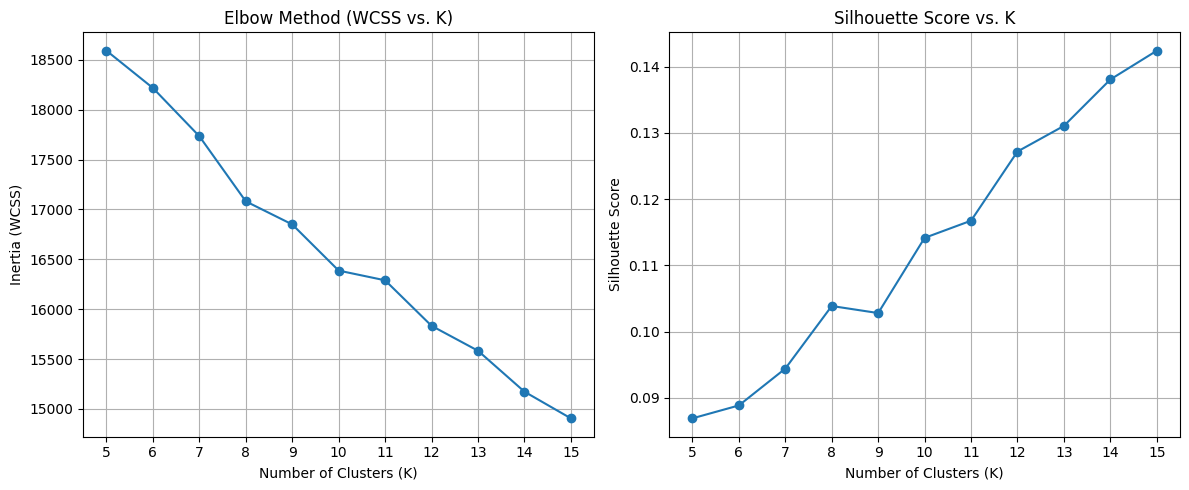


Review the plots to look for:
 - **Elbow Method:** A 'bend' or 'elbow' point where the inertia starts to decrease at a slower rate.
 - **Silhouette Score:** The highest point, indicating better-defined clusters.


In [24]:
from sklearn.metrics import silhouette_score
# --- Evaluate K-Means for a range of K values ---
# Choosing a reasonable range around your target of 8
range_n_clusters = range(5, 16) # Testing K from 5 to 12
inertias = []
silhouette_scores = []

print("\nEvaluating K-Means for different numbers of clusters...")

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(job_description_embeddings)
    inertias.append(kmeans.inertia_) # WCSS (Within-Cluster Sum of Squares)

    # Calculate Silhouette Score only if number of samples is greater than 1
    # and n_clusters is greater than 1
    if job_description_embeddings.shape[0] > 1 and n_clusters > 1:
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(job_description_embeddings, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"  K = {n_clusters}: Silhouette Score = {silhouette_avg:.4f}")
    else:
        silhouette_scores.append(np.nan) # Mark as NaN if not computable
        print(f"  K = {n_clusters}: Silhouette Score N/A (too few samples or K=1)")


# --- Plotting Elbow Method (WCSS) ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertias, marker='o')
plt.title('Elbow Method (WCSS vs. K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(range_n_clusters)
plt.grid(True)


# --- Plotting Silhouette Scores ---
plt.subplot(1, 2, 2)
# Ensure silhouette_scores list matches length of range_n_clusters for plotting
valid_silhouette_scores = [score for score in silhouette_scores if not np.isnan(score)]
valid_n_clusters = [n for n, score in zip(range_n_clusters, silhouette_scores) if not np.isnan(score)]

if valid_n_clusters:
    plt.plot(valid_n_clusters, valid_silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.xticks(valid_n_clusters)
    plt.grid(True)
else:
    plt.text(0.5, 0.5, 'Not enough data or K=1 to compute Silhouette Score',
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

print("\nReview the plots to look for:")
print(" - **Elbow Method:** A 'bend' or 'elbow' point where the inertia starts to decrease at a slower rate.")
print(" - **Silhouette Score:** The highest point, indicating better-defined clusters.")

In [35]:
all_possible_final_categories = [
    'IT / Development', 'Design & Arts', 'Healthcare', 'Business & Administration',
    'Legal', 'Data & AI', 'Marketing', 'Sales', 'Engineering & Manufacturing',
    'Other' # Fallback for unmapped or truly unclassifiable items
]


# ---  Create the Final 'Category' Column based on your manual mapping ---
print("\n--- Defining Final Category Mapping from Cluster IDs (0-8) ---")
print(f"Your target categories are: {', '.join(all_possible_final_categories[:-1])} (plus 'Other/Miscellaneous' if needed)")


# Map each of the K-Means cluster IDs to one of our 9 desired final categories.
cluster_to_final_category_map = {
    0: 'IT / Development',
    1: 'Design & Arts',
    2: 'Healthcare',
    3: 'Business & Administration',
    4: 'Legal',
    5: 'Data & AI',
    6: 'Marketing',
    7: 'Sales',
    8: 'Engineering & Manufacturing'
    # If one of our 9 categories doesn't align with a cluster at all, it might have no jobs in it
    # after this mapping, or its jobs are spread across multiple less-fitting clusters.
}

# Apply the mapping
df['Category'] = df['cluster_id'].map(cluster_to_final_category_map)

# Handle any cluster IDs that were not explicitly mapped (will result in NaN if map is incomplete)
if df['Category'].isnull().any():
    print("\nWarning: Some cluster IDs were not explicitly mapped (or resulted in NaN). Assigning 'Other' to them.")
    print("Unmapped cluster IDs:", df[df['Category'].isnull()]['cluster_id'].unique())
    df['Category'] = df['Category'].fillna('Other/Miscellaneous')


print("\nFinal 'Category' distribution:")
print(df['Category'].value_counts())

print("\nDataFrame with final 'Category' column:")
print(df[[original_title_col, original_description_col, 'Category']].head(10))


--- Defining Final Category Mapping from Cluster IDs (0-8) ---
Your target categories are: IT / Development, Design & Arts, Healthcare, Business & Administration, Legal, Data & AI, Marketing, Sales, Engineering & Manufacturing (plus 'Other/Miscellaneous' if needed)

Final 'Category' distribution:
Category
Sales                          6467
Engineering & Manufacturing    5099
Healthcare                     4360
Business & Administration      3904
Marketing                      3770
Design & Arts                  3680
Legal                          2790
Data & AI                      2527
IT / Development               1299
Name: count, dtype: int64

DataFrame with final 'Category' column:
                      Job_Title  \
0  Digital Marketing Specialist   
1                 Web Developer   
2            Operations Manager   
3              Network Engineer   
4                 Event Manager   
5               Software Tester   
6                       Teacher   
7                UX/U

Generating 'Category vs No. of Jobs' plot...


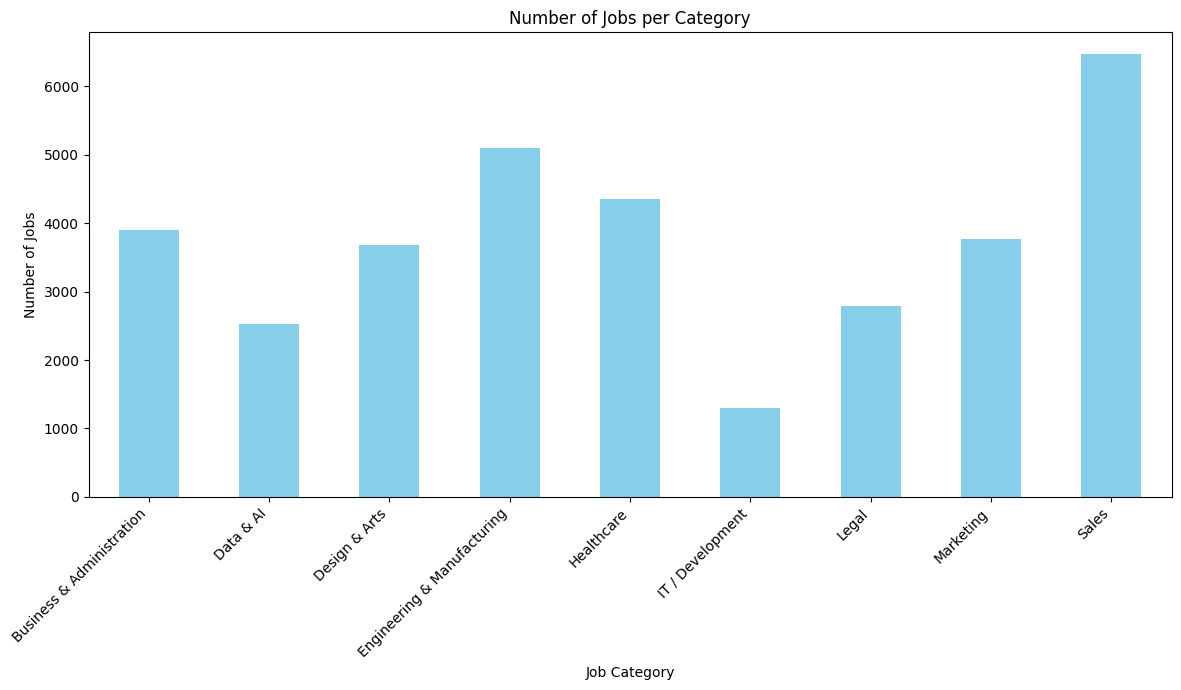

Plot 'category_job_counts.png' saved.


In [38]:
# Category vs. No. of jobs
print("Generating 'Category vs No. of Jobs' plot...")
category_counts = df['Category'].value_counts().sort_index()

plt.figure(figsize=(12, 7))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Jobs per Category')
plt.xlabel('Job Category')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('category_job_counts.png')
plt.close()
print("Plot 'category_job_counts.png' saved.")

Generating 'Average Salary per Category' plot...


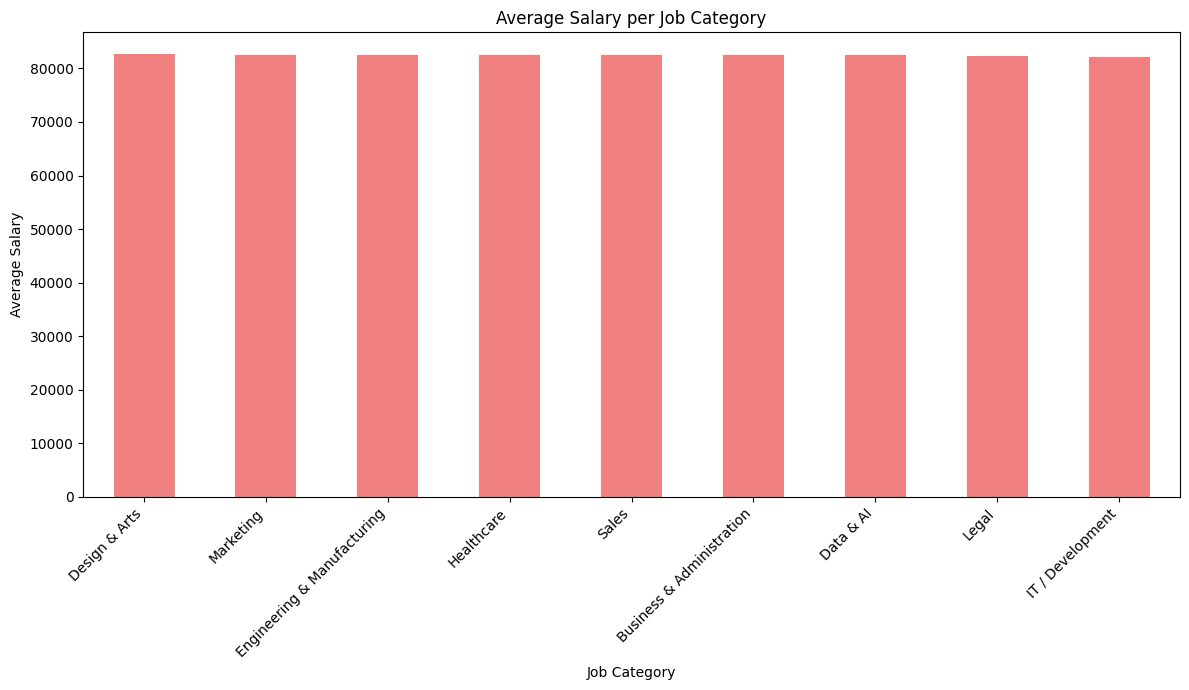

Plot 'avg_salary_per_category.png' saved.


In [39]:
print("Generating 'Average Salary per Category' plot...")
# Drop rows where 'Average_Salary' is NaN before calculating mean
avg_salary_per_category = df.dropna(subset=['Average_Salary']).groupby('Category')['Average_Salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
avg_salary_per_category.plot(kind='bar', color='lightcoral')
plt.title('Average Salary per Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('avg_salary_per_category.png')
plt.close()
print("Plot 'avg_salary_per_category.png' saved.")

Generating 'Average Minimum Experience per Category' plot...


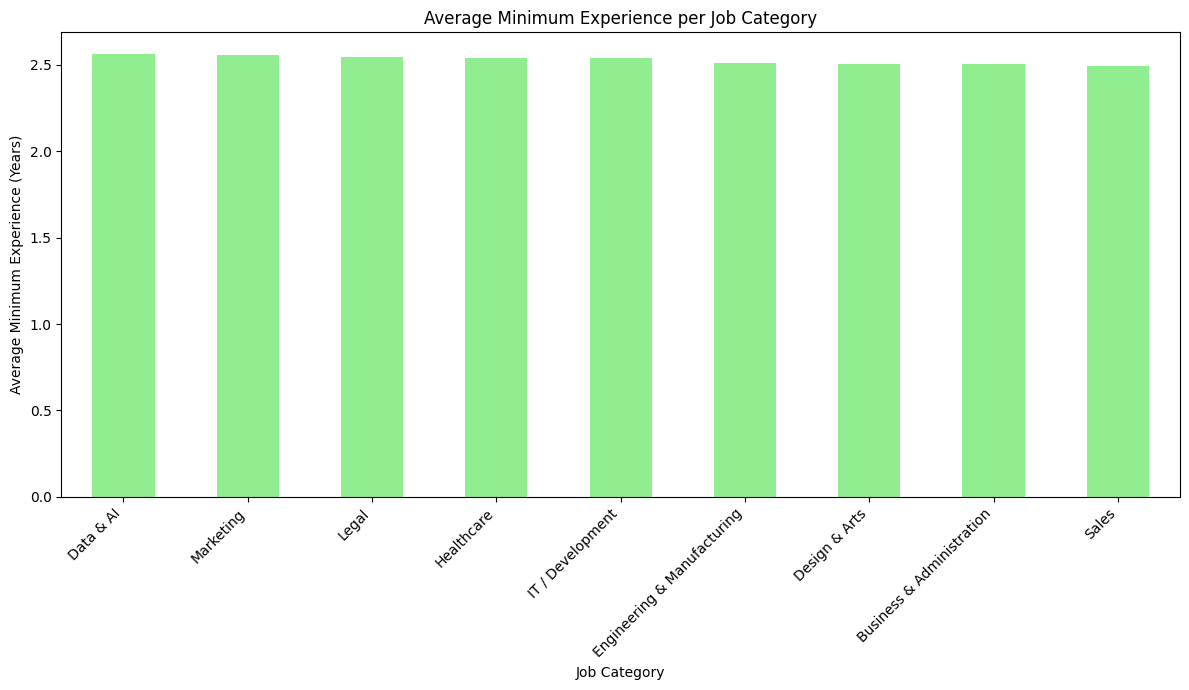

Plot 'min_exp_per_category.png' saved.


In [40]:
# Category vs. Min Exp
print("Generating 'Average Minimum Experience per Category' plot...")
# Drop rows where 'Min_Experience' is NaN before calculating mean
min_exp_per_category = df.dropna(subset=['Min_Experience']).groupby('Category')['Min_Experience'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
min_exp_per_category.plot(kind='bar', color='lightgreen')
plt.title('Average Minimum Experience per Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Minimum Experience (Years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('min_exp_per_category.png')
plt.close()
print("Plot 'min_exp_per_category.png' saved.")

Generating 'Work Type vs. No. of Jobs' plot...


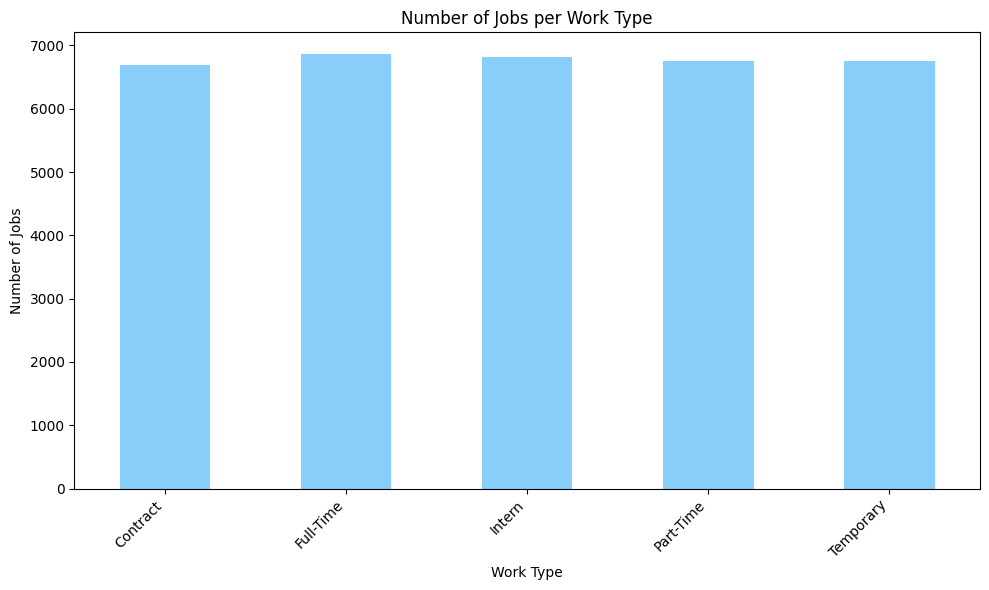

Plot 'work_type_job_counts.png' saved.


In [43]:
print("Generating 'Work Type vs. No. of Jobs' plot...")

# Calculate the count of jobs for each Work_Type
work_type_counts = df['Work_Type'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
work_type_counts.plot(kind='bar', color='lightskyblue')
plt.title('Number of Jobs per Work Type')
plt.xlabel('Work Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
plt.savefig('work_type_job_counts.png')
plt.close() # Close the plot to free up memory
print("Plot 'work_type_job_counts.png' saved.")

Generating 'Number of Jobs per YearMonth' curve plot...


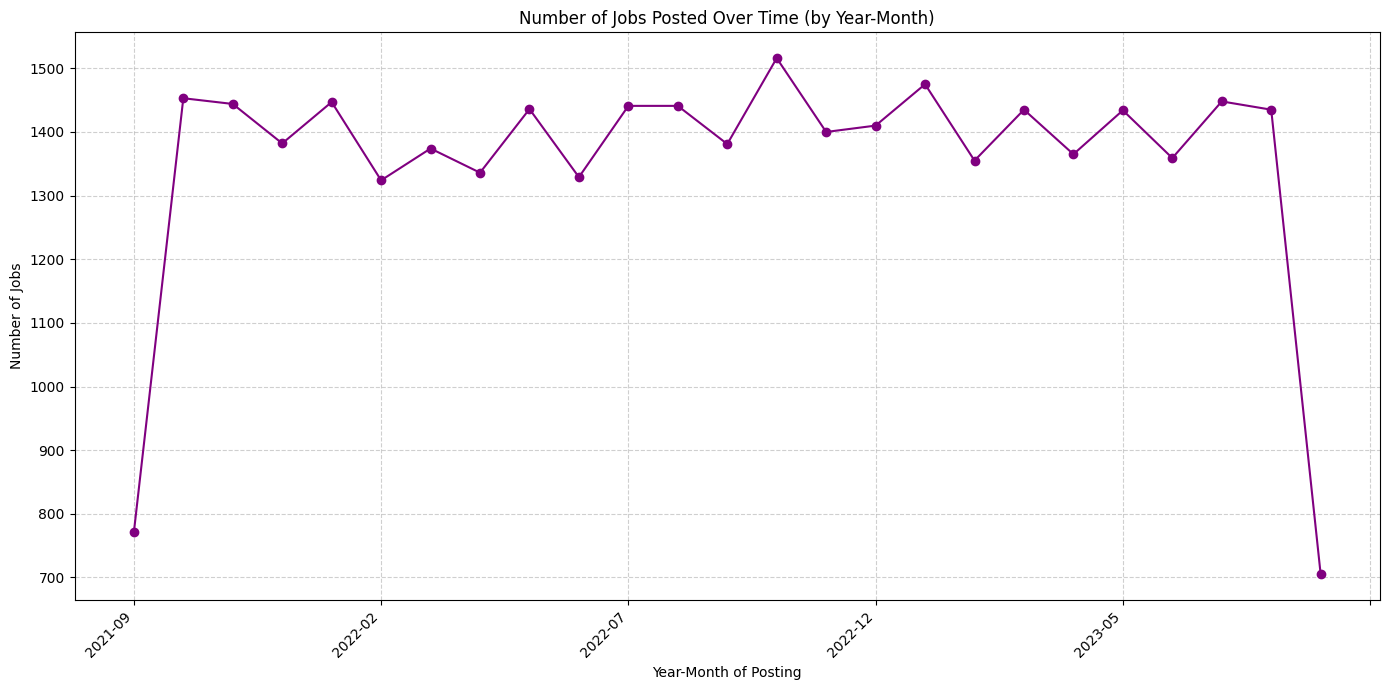

Plot 'jobs_per_yearmonth_curve.png' saved.


In [44]:
print("Generating 'Number of Jobs per YearMonth' curve plot...")

# Calculate the count of jobs for each Job_Posting_YearMonth
jobs_per_yearmonth = df['Job_Posting_YearMonth'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
jobs_per_yearmonth.plot(kind='line', marker='o', color='purple')
plt.title('Number of Jobs Posted Over Time (by Year-Month)')
plt.xlabel('Year-Month of Posting')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.savefig('jobs_per_yearmonth_curve.png')
plt.close()
print("Plot 'jobs_per_yearmonth_curve.png' saved.")



Generating Word Clouds for each category...


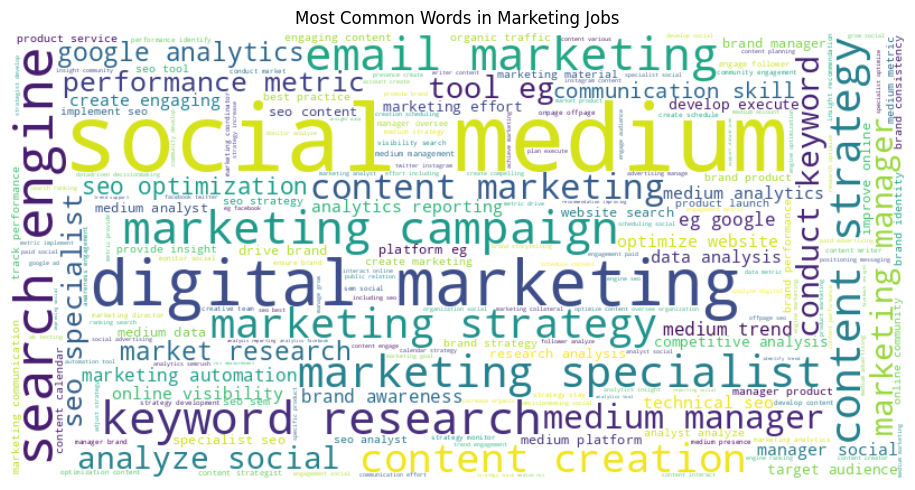

Word cloud for 'Marketing' saved as 'wordcloud_Marketing.png'.


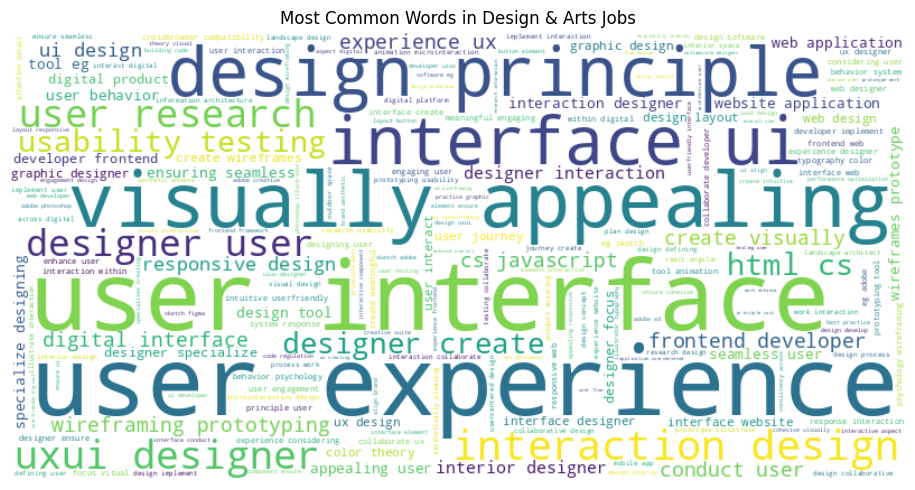

Word cloud for 'Design & Arts' saved as 'wordcloud_Design_&_Arts.png'.


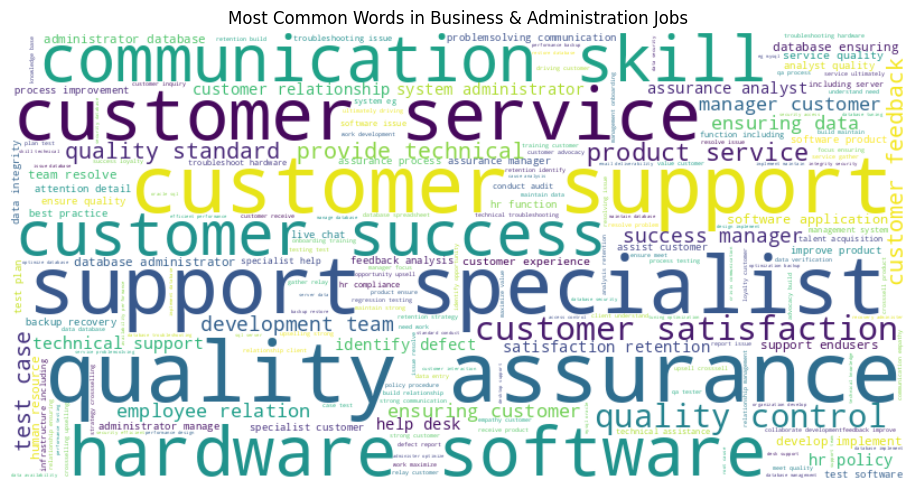

Word cloud for 'Business & Administration' saved as 'wordcloud_Business_&_Administration.png'.


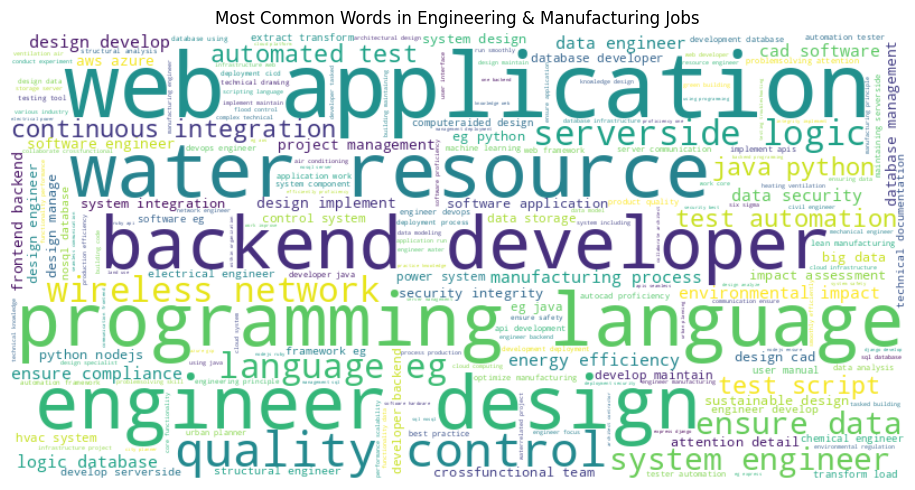

Word cloud for 'Engineering & Manufacturing' saved as 'wordcloud_Engineering_&_Manufacturing.png'.


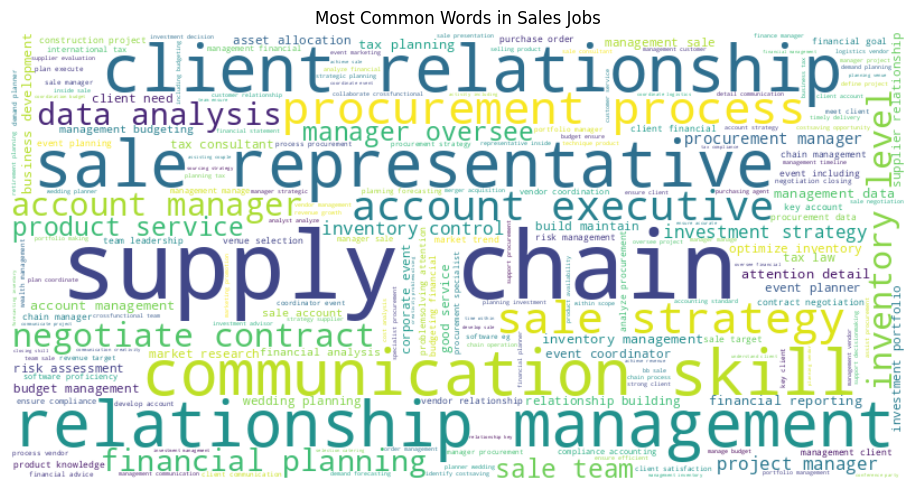

Word cloud for 'Sales' saved as 'wordcloud_Sales.png'.


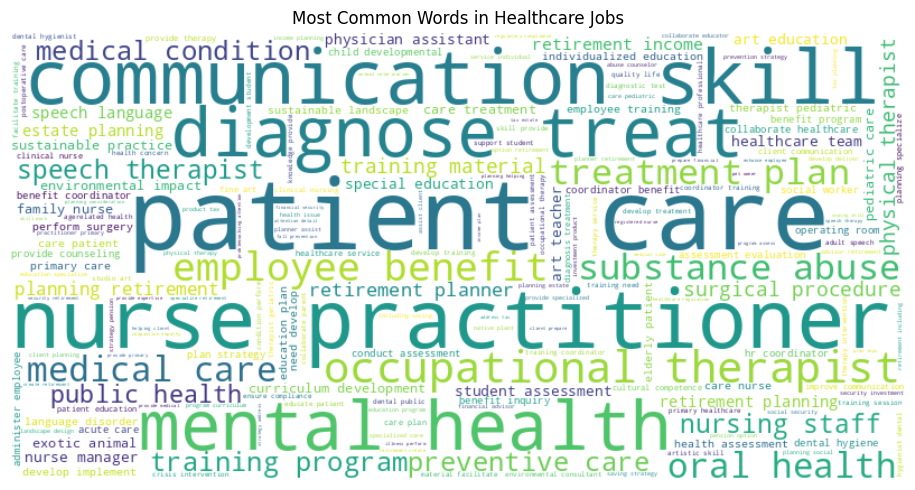

Word cloud for 'Healthcare' saved as 'wordcloud_Healthcare.png'.


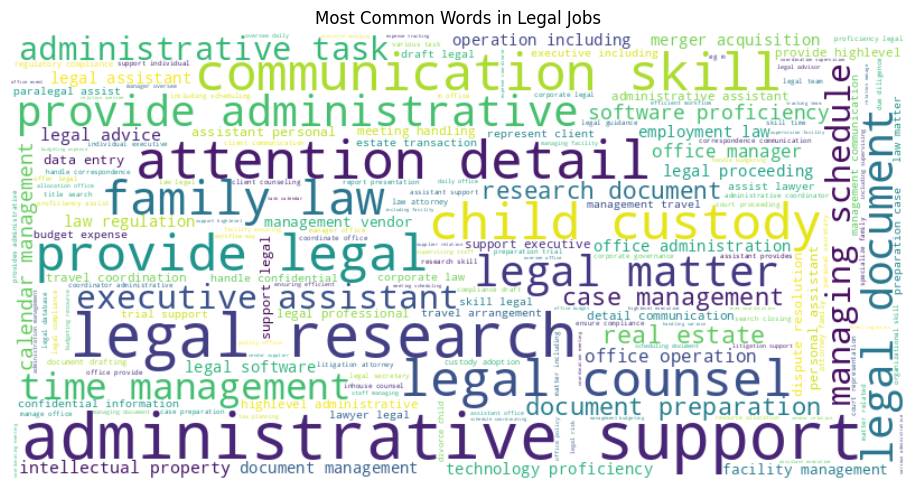

Word cloud for 'Legal' saved as 'wordcloud_Legal.png'.


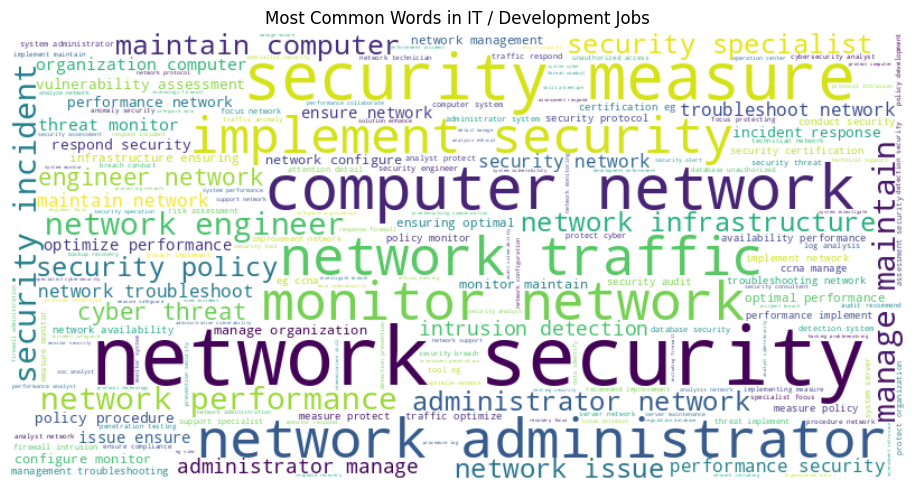

Word cloud for 'IT / Development' saved as 'wordcloud_IT___Development.png'.


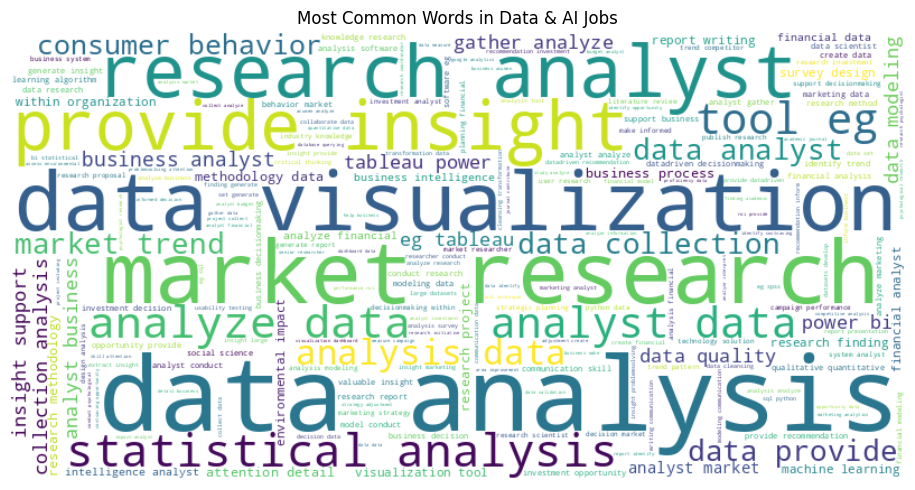

Word cloud for 'Data & AI' saved as 'wordcloud_Data_&_AI.png'.

All requested word clouds have been generated and saved as PNG files.


In [46]:
from wordcloud import WordCloud
print("\nGenerating Word Clouds for each category...")

# Ensure 'Category' and 'cleaned_full_text' columns exist
if 'Category' not in df.columns or 'cleaned_full_text' not in df.columns:
    print("Error: 'Category' or 'cleaned_full_text' columns not found. Cannot generate word clouds.")
else:
    # Iterate through each unique category to generate a word cloud
    for category in df['Category'].unique():
        if pd.isna(category): # Skip NaN categories if any
            continue

        # Filter DataFrame for the current category
        category_df = df[df['Category'] == category]

        # Concatenate all cleaned_full_text for the current category
        # Ensure only non-null strings are joined
        text_for_wordcloud = " ".join(category_df['cleaned_full_text'].dropna().tolist())

        if not text_for_wordcloud.strip(): # Skip if no text available for the category
            print(f"Skipping word cloud for '{category}' (no text available).")
            continue

        # Generate word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

        # Save the word cloud image
        file_name = f"wordcloud_{category.replace(' ', '_').replace('/', '_')}.png"
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Most Common Words in {category} Jobs')
        plt.tight_layout()
        plt.show()
        plt.savefig(file_name)
        plt.close()
        print(f"Word cloud for '{category}' saved as '{file_name}'.")

print("\nAll requested word clouds have been generated and saved as PNG files.")

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nStarting Model Training Phase...")

text_feature = 'cleaned_full_text'
numerical_features = ['Min_Experience', 'Average_Experience', 'Min_Salary', 'Average_Salary', 'Qualifications','Company_Size']
categorical_features = ['Work_Type', 'Preference']

all_features = [text_feature] + numerical_features + categorical_features

X = df[all_features]
y = df['Category']

# --- 2. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nData split into training ({len(X_train)} samples) and test ({len(X_test)} samples).")
print(f"Training set category distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test set category distribution:\n{y_test.value_counts(normalize=True)}")


Starting Model Training Phase...

Data split into training (27116 samples) and test (6780 samples).
Training set category distribution:
Category
Sales                          0.190773
Engineering & Manufacturing    0.150428
Healthcare                     0.128633
Business & Administration      0.115172
Marketing                      0.111226
Design & Arts                  0.108571
Legal                          0.082313
Data & AI                      0.074569
IT / Development               0.038317
Name: proportion, dtype: float64
Test set category distribution:
Category
Sales                          0.190855
Engineering & Manufacturing    0.150442
Healthcare                     0.128614
Business & Administration      0.115192
Marketing                      0.111209
Design & Arts                  0.108555
Legal                          0.082301
Data & AI                      0.074484
IT / Development               0.038348
Name: proportion, dtype: float64


In [49]:
# --- 3. Build Preprocessing Pipelines with ColumnTransformer ---

# Preprocessing for numerical features: Impute NaNs with median, then scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features: Impute NaNs with most frequent, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for text feature: TF-IDF Vectorization
# max_features limits the vocabulary size, preventing extremely high dimensionality
text_transformer = TfidfVectorizer(max_features=10000)


# Create ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, text_feature),
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns if any (though 'all_features' covers everything)
)

print("\nPreprocessing pipelines and ColumnTransformer defined.")

# --- 4. Create Final Model Pipeline ---
# Chain the preprocessor with the SVC model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', random_state=42, probability=True))
    ])

model_pipeline.fit(X_train, y_train)

print("\nEvaluating model performance on the test set...")
y_pred = model_pipeline.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Preprocessing pipelines and ColumnTransformer defined.

Evaluating model performance on the test set...

Classification Report:
                             precision    recall  f1-score   support

  Business & Administration       1.00      1.00      1.00       781
                  Data & AI       1.00      1.00      1.00       505
              Design & Arts       1.00      1.00      1.00       736
Engineering & Manufacturing       1.00      1.00      1.00      1020
                 Healthcare       1.00      1.00      1.00       872
           IT / Development       1.00      1.00      1.00       260
                      Legal       1.00      1.00      1.00       558
                  Marketing       1.00      1.00      1.00       754
                      Sales       1.00      1.00      1.00      1294

                   accuracy                           1.00      6780
                  macro avg       1.00      1.00      1.00      6780
               weighted avg       1.00   

In [50]:
from sklearn.ensemble import RandomForestClassifier

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')) # Added class_weight for imbalanced classes
])

print("\nFinal model pipeline (Preprocessor + Random Forest) created.")


# ---  Train Model ---
print("\nTraining Random Forest model (this may take a while)...")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")


# ---  Evaluate Model ---
print("\nEvaluating model performance on the test set...")
y_pred = model_pipeline.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_mat = confusion_matrix(y_test, y_pred, labels=model_pipeline.classes_)
conf_mat_df = pd.DataFrame(conf_mat, index=model_pipeline.classes_, columns=model_pipeline.classes_)
print(conf_mat_df)

print(f"\nOverall Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nRandom Forest model training and evaluation finished.")


Final model pipeline (Preprocessor + Random Forest) created.

Training Random Forest model (this may take a while)...
Model training complete.

Evaluating model performance on the test set...

Classification Report:
                             precision    recall  f1-score   support

  Business & Administration       1.00      1.00      1.00       781
                  Data & AI       1.00      1.00      1.00       505
              Design & Arts       1.00      1.00      1.00       736
Engineering & Manufacturing       1.00      1.00      1.00      1020
                 Healthcare       1.00      1.00      1.00       872
           IT / Development       1.00      1.00      1.00       260
                      Legal       1.00      1.00      1.00       558
                  Marketing       1.00      1.00      1.00       754
                      Sales       1.00      1.00      1.00      1294

                   accuracy                           1.00      6780
                  macr